In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
data = pd.read_csv("/content/drive/MyDrive/heart_attack_prediction_dataset.csv")
row_del = data[data["Heart Attack Risk"] == 1].head(1300).index
data = data.drop(row_del)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7463 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7463 non-null   object 
 1   Age                              7463 non-null   int64  
 2   Sex                              7463 non-null   object 
 3   Cholesterol                      7463 non-null   int64  
 4   Blood Pressure                   7463 non-null   object 
 5   Heart Rate                       7463 non-null   int64  
 6   Diabetes                         7463 non-null   int64  
 7   Family History                   7463 non-null   int64  
 8   Smoking                          7463 non-null   int64  
 9   Obesity                          7463 non-null   int64  
 10  Alcohol Consumption              7463 non-null   int64  
 11  Exercise Hours Per Week          7463 non-null   float64
 12  Diet                

In [183]:


data.dtypes



Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [184]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [185]:
data.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [186]:
data = data.dropna()
data = data[data['Blood Pressure'] != 'nan']
# data2 = data2.drop(["Patient ID" , "Country" , 	"Continent" , 	"Hemisphere"] , axis = 1)
# data2 = data2.drop_duplicates()
# data2[["Systolic" , "Diastolic"]] = data2["Blood Pressure"].str.split("/", expand = True)
# data2 = data2.drop(["Blood Pressure"] , axis = 1)
# data2

data['BP_systolic'] = data['Blood Pressure'].apply(lambda x: str(x).split("/")[0])
data['BP_diastolic'] = data['Blood Pressure'].apply(lambda x: str(x).split("/")[-1])

data.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_systolic,BP_diastolic
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [187]:
# d1 = data2[["Age" ,	"Sex", 	"Cholesterol" ]]
# sys = data2["Systolic"]
# dia = data2["Diastolic"]
# d2 = data2[["Heart Rate" ,	"Diabetes",	"Family History",	"Smoking", 	"Obesity",	"Alcohol Consumption", 	"Exercise Hours Per Week" ,"Diet",  "Previous Heart Problems",  "Medication Use" ,
# "Stress Level", 	"Sedentary Hours Per Day" , 	"Income",	"BMI", 	"Triglycerides", 	"Physical Activity Days Per Week", 	"Sleep Hours Per Day",	"Heart Attack Risk"]]
# data2 = pd.concat([d1, sys , dia , d2], axis=1)
# data2

data = data[['Age', 'Sex', 'Cholesterol',
#          'Blood Pressure',
          'BP_systolic', 'BP_diastolic',
         'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk']]
data.head()

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158,88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165,93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174,99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163,100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91,88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


0    5624
1    1839
Name: Heart Attack Risk, dtype: int64


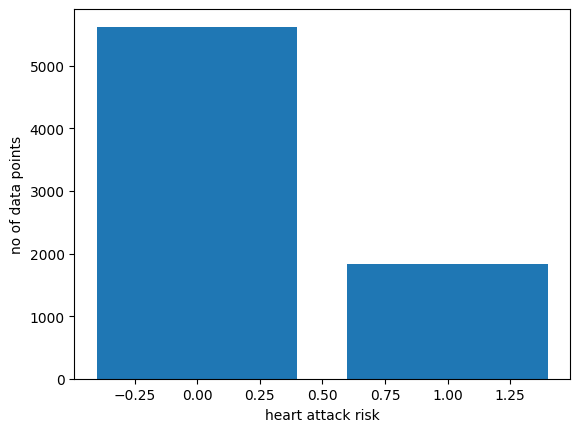

In [188]:
d = data["Heart Attack Risk"].value_counts()
import matplotlib.pyplot as plt
x = np.array(d.keys())
y = np.array([d[0] , d[1]])
plt.bar(x , y)
plt.xlabel("heart attack risk")
plt.ylabel("no of data points")
print(d)

In [189]:
#Label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["Sex"]= le.fit_transform(data["Sex"])
data["Diet"]= le.fit_transform(data["Diet"])

In [190]:
data

,Age,Sex,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,158,88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,1,389,165,93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,0,324,174,99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,1,383,163,100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,1,318,91,88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,94,76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,28,0,120,157,102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,47,1,250,161,75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,36,1,178,119,67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [191]:

data['BP_systolic'] = pd.to_numeric(data['BP_systolic'])
data['BP_diastolic'] = pd.to_numeric(data['BP_diastolic'])
data.dtypes

Age                                  int64
Sex                                  int64
Cholesterol                          int64
BP_systolic                          int64
BP_diastolic                         int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

<ipython-input-192-966f67e6fe00>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()[target_variable]
<ipython-input-192-966f67e6fe00>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, correlation in selected_features.iteritems():


Selected Features with Correlation > Threshold:
Cholesterol: 0.02
BP_systolic: 0.03
Heart Rate: -0.01
Diabetes: 0.02
Sedentary Hours Per Day: -0.01
Triglycerides: 0.01
Physical Activity Days Per Week: -0.02
Sleep Hours Per Day: -0.02
Heart Attack Risk: 1.00


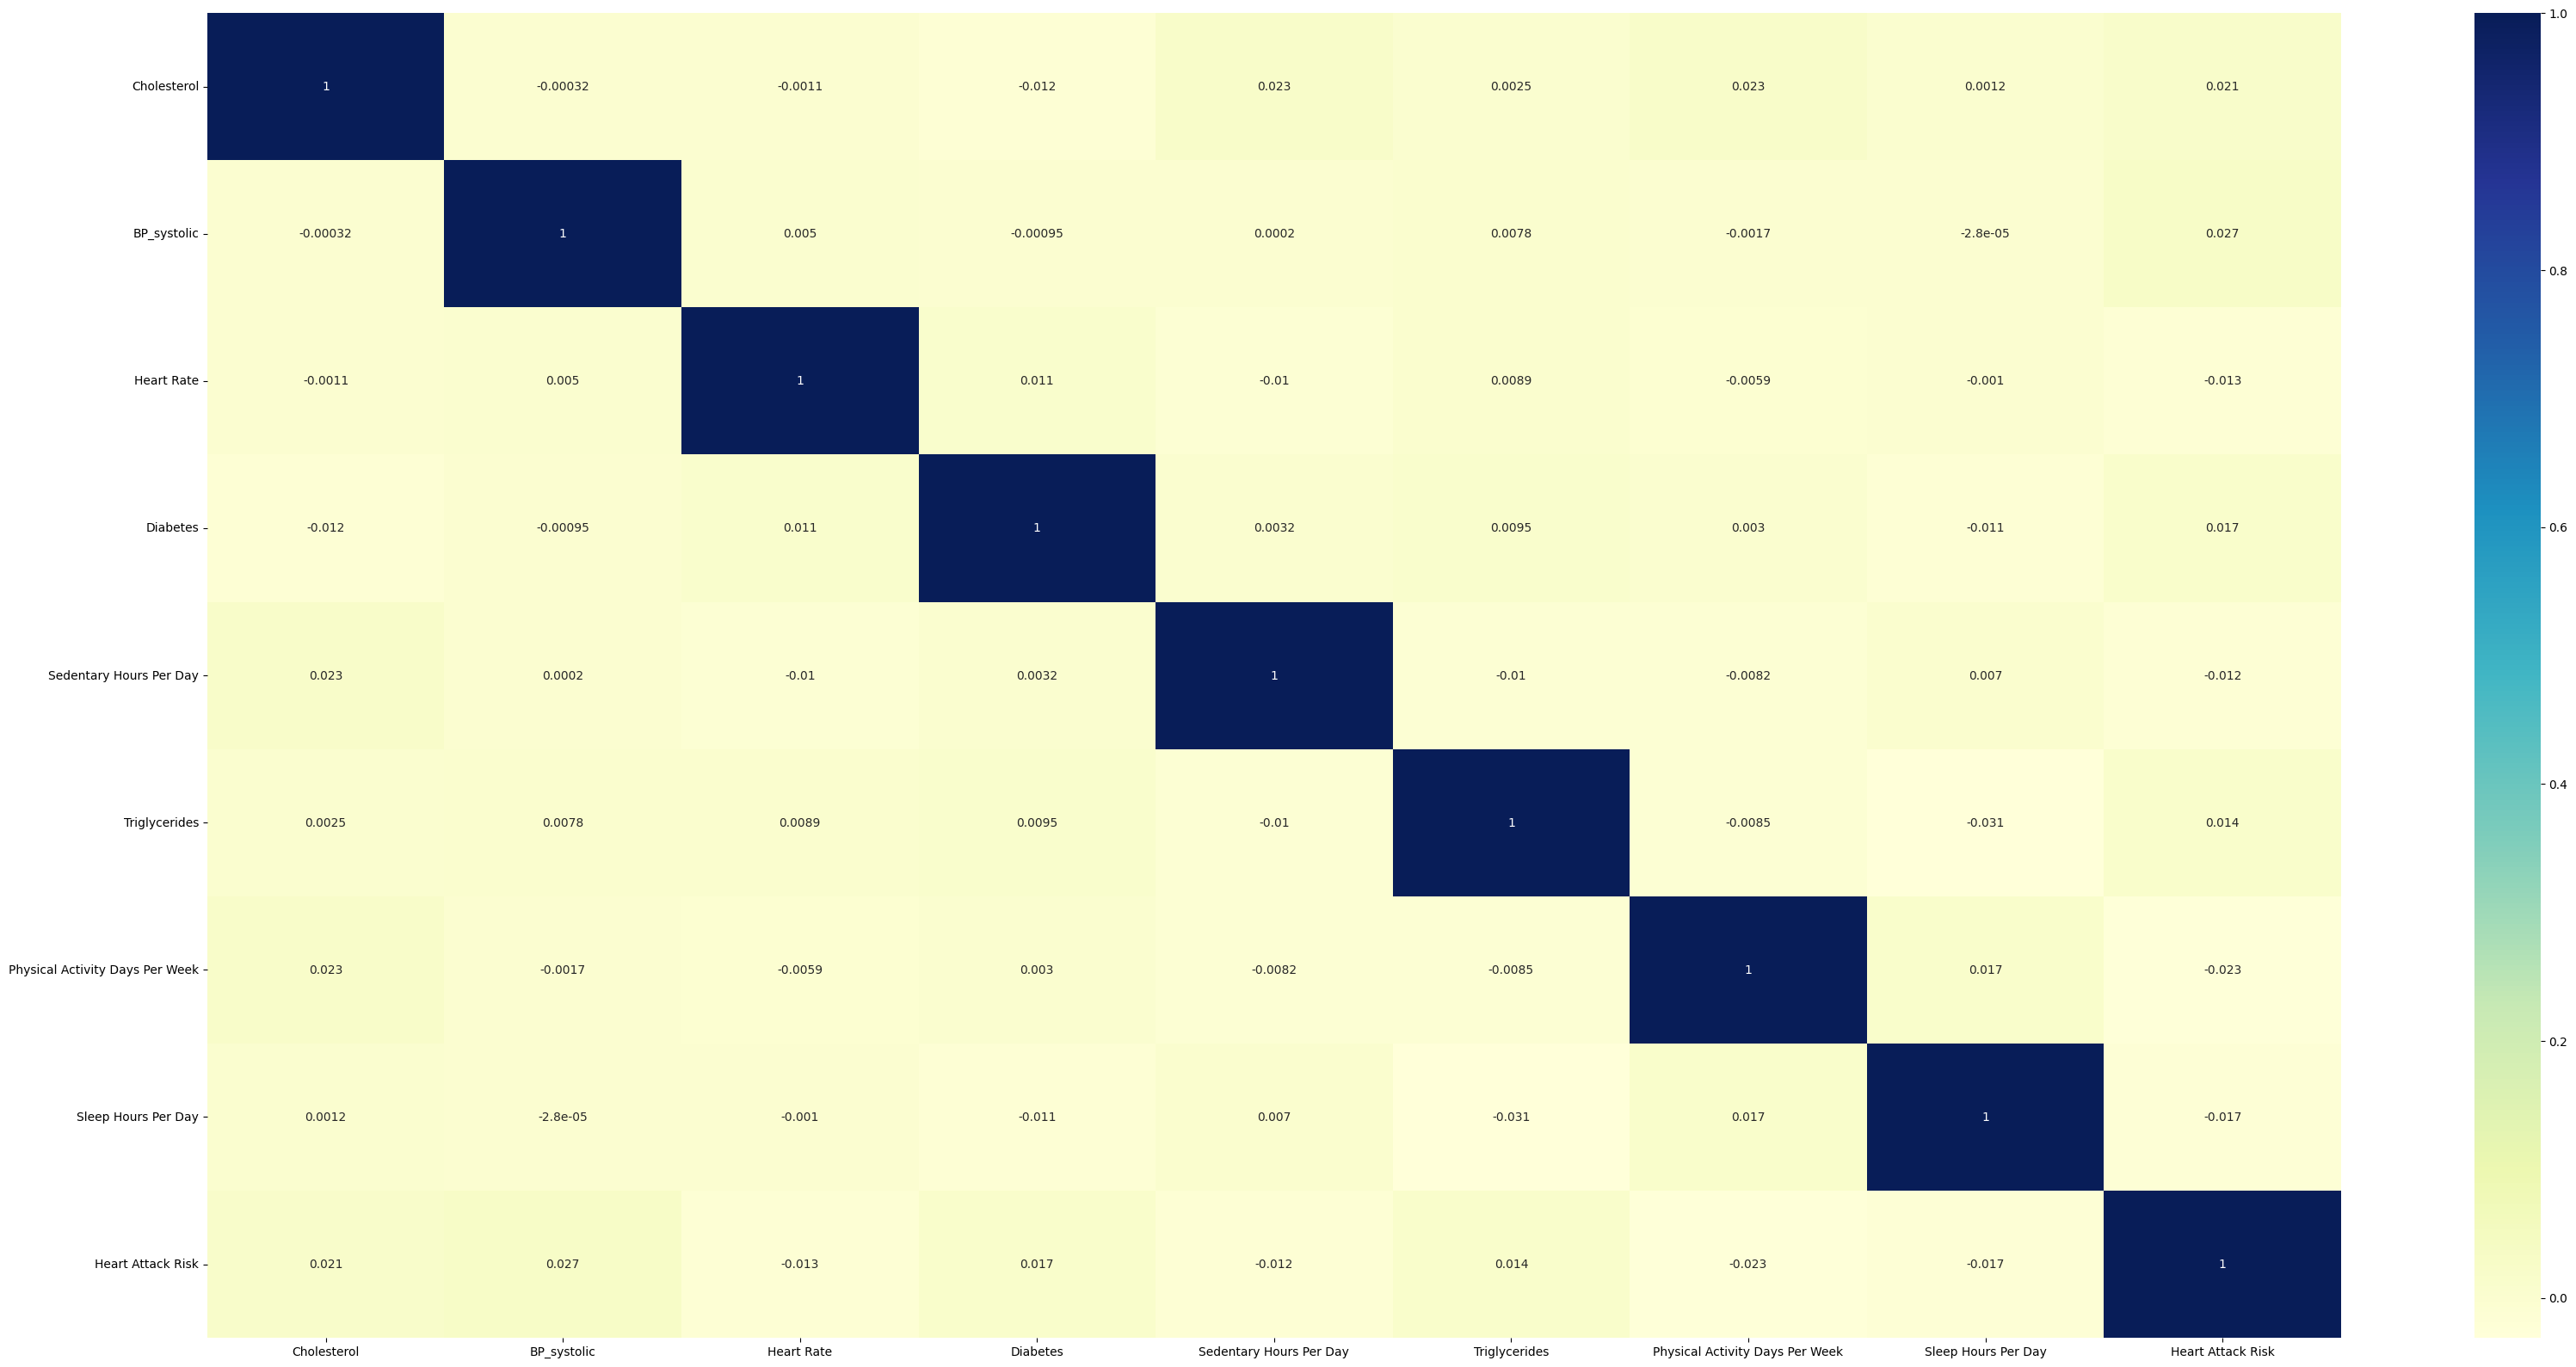

Cholesterol                        0.020738
BP_systolic                        0.026800
Heart Rate                        -0.012561
Diabetes                           0.017063
Sedentary Hours Per Day           -0.012254
Triglycerides                      0.013742
Physical Activity Days Per Week   -0.023120
Sleep Hours Per Day               -0.016791
Heart Attack Risk                  1.000000
Name: Heart Attack Risk, dtype: float64


In [192]:

import pandas as pd
import seaborn as sns



# Define the target variable (e.g., 'Heart Attack risk')
target_variable = "Heart Attack Risk"

# Compute the correlation of each feature with the target variable
correlation_with_target = data.corr()[target_variable]

# Define the correlation threshold
threshold = 0.01

# Select features with a correlation greater than the threshold
selected_features = correlation_with_target[correlation_with_target.abs() > threshold]

# Print the selected features and their correlation values
print("Selected Features with Correlation > Threshold:")
for feature, correlation in selected_features.iteritems():
    print(f"{feature}: {correlation:.2f}")

# Plot the correlation heatmap for selected features
selected_data = data[selected_features.index]  # Create a DataFrame with selected features
plt.figure(figsize=(40, 20))
sns.heatmap(selected_data.corr(), cmap="YlGnBu", annot=True)
plt.show()
print(selected_features)

In [193]:
features = list(selected_features.keys())
indep = data[features].drop("Heart Attack Risk" , axis = 1)
target = data[target_variable]

from sklearn.model_selection import train_test_split
x_train , x_test  , y_train , y_test = train_test_split(indep , target , train_size = 0.6 )

In [194]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score
lr = LogisticRegression(max_iter=10000).fit(x_train, y_train)
y_test_pred_lr_unbalance = lr.predict(x_test)
lr_test_unbalance = classification_report(y_test, y_test_pred_lr_unbalance , target_names = ["class1" , "class2"])
print("confusion matrix: \n")
print(confusion_matrix(y_test, y_test_pred_lr_unbalance))
print("classification reportfor unbalanced test data by logistic regression")
print(lr_test_unbalance)

confusion matrix: 

[[2250    0]
 [ 736    0]]
classification reportfor unbalanced test data by logistic regression
              precision    recall  f1-score   support

      class1       0.75      1.00      0.86      2250
      class2       0.00      0.00      0.00       736

    accuracy                           0.75      2986
   macro avg       0.38      0.50      0.43      2986
weighted avg       0.57      0.75      0.65      2986



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [195]:
#decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score
dtc_unbalance = DecisionTreeClassifier()
dtc_unbalance.fit(x_train, y_train)
y_test_pred_dtc_unbalance = dtc_unbalance.predict(x_test)


In [196]:
print("confusion matrix: \n")
print(confusion_matrix(y_test, y_test_pred_dtc_unbalance))
print("classification reportfor unbalanced test data by decision tree")
dt_train_unbalance = classification_report(y_test, y_test_pred_dtc_unbalance , target_names = ["class1" , "class2"])
print(dt_train_unbalance)

confusion matrix: 

[[1623  627]
 [ 534  202]]
classification reportfor unbalanced test data by decision tree
              precision    recall  f1-score   support

      class1       0.75      0.72      0.74      2250
      class2       0.24      0.27      0.26       736

    accuracy                           0.61      2986
   macro avg       0.50      0.50      0.50      2986
weighted avg       0.63      0.61      0.62      2986



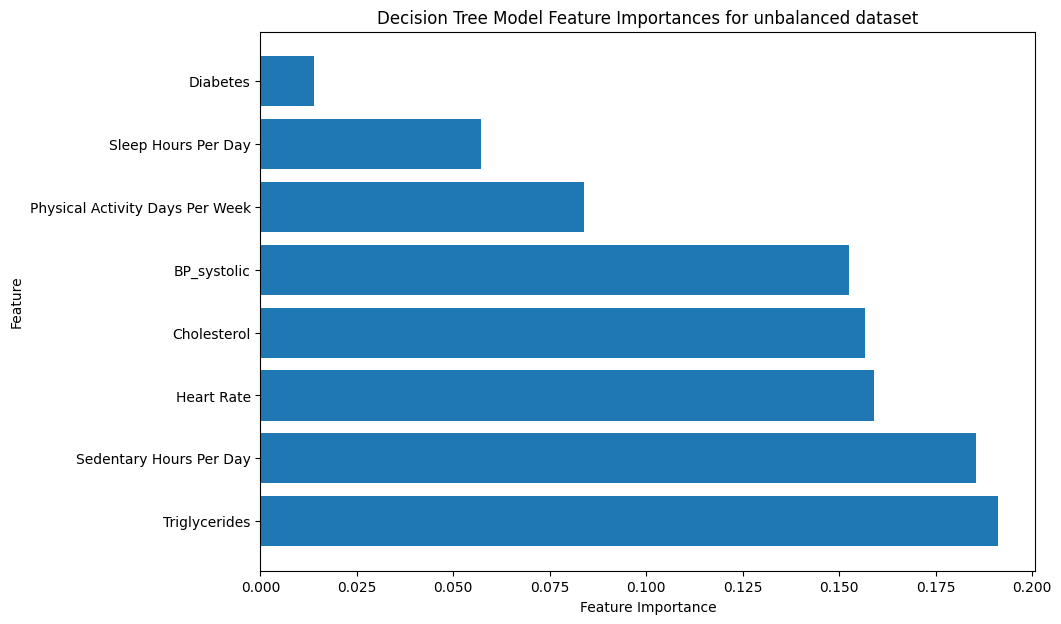

In [197]:
dt_feature_importances_unbalance = dtc_unbalance.feature_importances_
dt_features_unbalance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': dt_feature_importances_unbalance
}).sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.barh(dt_features_unbalance['Feature'], dt_features_unbalance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Model Feature Importances for unbalanced dataset')
plt.show()

In [198]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc_unbalance = RandomForestClassifier(random_state=42)
rfc_unbalance.fit(x_train, y_train)
y_train_pred_rfc_unbalance = rfc_unbalance.predict(x_train)
y_test_pred_rfc_unbalance = rfc_unbalance.predict(x_test)
rfc_test_unbalance = classification_report(y_test, y_test_pred_rfc_unbalance , target_names = ["class1" , "class2"])



In [199]:
print("confusion matrix: \n")
print(confusion_matrix(y_test, y_test_pred_rfc_unbalance))
print("classification reportfor unbalanced test data by random forest")
rfc_test_unbalance = classification_report(y_test, y_test_pred_rfc_unbalance , target_names = ["class1" , "class2"])
print(rfc_test_unbalance)

confusion matrix: 

[[2232   18]
 [ 729    7]]
classification reportfor unbalanced test data by logistic regression
              precision    recall  f1-score   support

      class1       0.75      0.99      0.86      2250
      class2       0.28      0.01      0.02       736

    accuracy                           0.75      2986
   macro avg       0.52      0.50      0.44      2986
weighted avg       0.64      0.75      0.65      2986



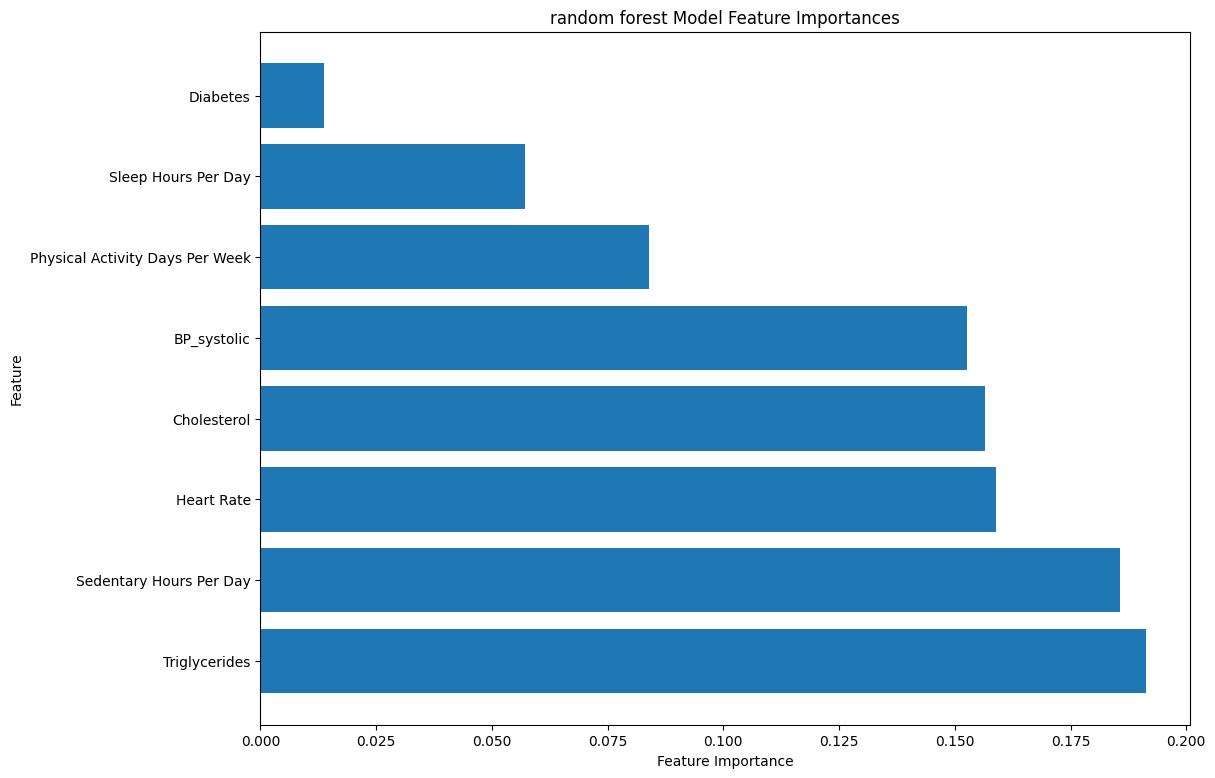

In [200]:
rfc_feature_importances_unbalance = rfc_unbalance.feature_importances_
rfc_features_unbalance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': dt_feature_importances_unbalance
}).sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.barh(dt_features_unbalance['Feature'], dt_features_unbalance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('random forest Model Feature Importances')
plt.show()

In [201]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [202]:
x_train

,Cholesterol,BP_systolic,Heart Rate,Diabetes,Sedentary Hours Per Day,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
8130,134,128,51,1,2.462100,248,7,5
8215,151,159,59,1,6.239260,67,3,10
3290,362,165,52,0,7.267513,417,2,5
7163,276,125,45,0,6.260663,621,6,6
4656,200,90,42,1,11.278984,688,7,10
...,...,...,...,...,...,...,...,...
5268,153,98,100,0,0.807525,216,3,10
7552,173,103,98,0,8.841575,638,2,7
8159,352,111,76,0,8.900759,693,0,6
3941,266,176,63,0,0.525078,399,3,7


In [203]:
m = y_resampled.value_counts()
m

0    3374
1    3374
Name: Heart Attack Risk, dtype: int64

Text(0, 0.5, 'no of data points')

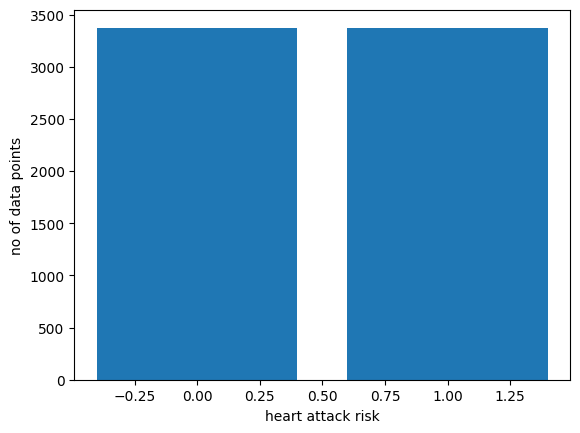

In [204]:
n = y_resampled.value_counts()
import matplotlib.pyplot as plt
x = np.array(n.keys())
y = np.array([n[0] , n[1]])
plt.bar(x , y)
plt.xlabel("heart attack risk")
plt.ylabel("no of data points")

In [205]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
lr = LogisticRegression(max_iter=10000).fit(x_resampled, y_resampled)
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr_balance = lr.predict(x_test)



In [206]:
print("confusion matrix: \n")
print(confusion_matrix(y_test, y_test_pred_lr_balance))
print("classification reportfor balanced test data by logistic regression")
lr_test_balance = classification_report(y_test, y_test_pred_lr_balance , target_names = ["class1" , "class2"])
print(lr_test_balance)

confusion matrix: 

[[1300  950]
 [ 421  315]]
classification reportfor balanced test data by logistic regression
              precision    recall  f1-score   support

      class1       0.76      0.58      0.65      2250
      class2       0.25      0.43      0.31       736

    accuracy                           0.54      2986
   macro avg       0.50      0.50      0.48      2986
weighted avg       0.63      0.54      0.57      2986



In [207]:
#decision tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_resampled, y_resampled)


DecisionTreeClassifier()

In [208]:
y_train_pred_dtc = dtc.predict(x_train)
y_test_pred_dtc_balance = dtc.predict(x_test)

In [209]:
# print("Accuracy Score, Confusion Matrix for test data")
# print("Accuracy Score: ", accuracy_score(y_test, y_test_pred_dtc))
# print("Confusion matrix: \n")
# print( confusion_matrix(y_test, y_test_pred_dtc))

In [210]:
# print("For test data :")
# print("Precision: ", precision_score(y_test, y_test_pred_dtc, average= None))
# print("Recall: ", recall_score(y_test, y_test_pred_dtc, average= None))
# print("F1-Score: ", f1_score(y_test, y_test_pred_dtc, average= None))

In [211]:
print("confusion matrix: \n")
print(confusion_matrix(y_test,y_test_pred_dtc_balance))
print("classification reportfor balanced test data by decision tree")
dt_test_balance = classification_report(y_test, y_test_pred_dtc_balance , target_names = ["class1" , "class2"])
print(dt_test_balance)

confusion matrix: 

[[1413  837]
 [ 486  250]]
classification reportfor balanced test data by decision tree
              precision    recall  f1-score   support

      class1       0.74      0.63      0.68      2250
      class2       0.23      0.34      0.27       736

    accuracy                           0.56      2986
   macro avg       0.49      0.48      0.48      2986
weighted avg       0.62      0.56      0.58      2986



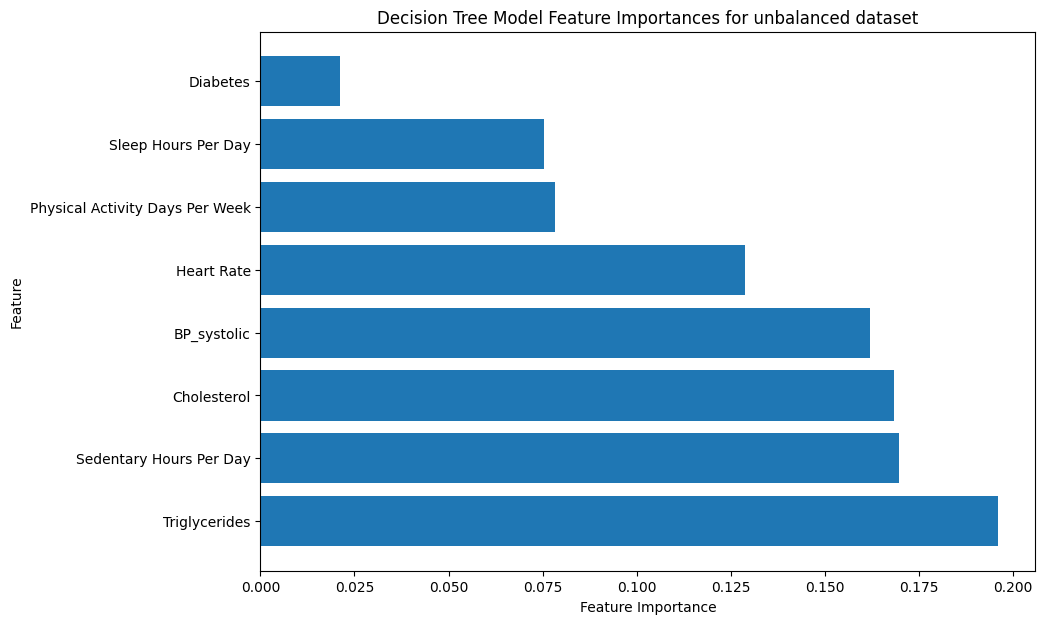

In [212]:
dt_feature_importances_balance = dtc.feature_importances_
dt_features_balance = pd.DataFrame({
    'Feature': x_resampled.columns,
    'Importance': dt_feature_importances_balance
}).sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.barh(dt_features_balance['Feature'], dt_features_balance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Model Feature Importances for unbalanced dataset')
plt.show()

In [213]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_resampled, y_resampled)
y_train_pred_rfc = rfc.predict(x_train)
y_test_pred_rfc = rfc.predict(x_test)


In [214]:
print("confusion matrix: \n")
print( confusion_matrix(y_test, y_test_pred_rfc))
print("classification report for test data by random forest: \n")
rfc_test_bal = classification_report(y_test, y_test_pred_rfc , target_names = ["class1" , "class2"])
print(rfc_test_bal)

confusion matrix: 

[[1646  604]
 [ 530  206]]
classification report for test data by random forest: 

              precision    recall  f1-score   support

      class1       0.76      0.73      0.74      2250
      class2       0.25      0.28      0.27       736

    accuracy                           0.62      2986
   macro avg       0.51      0.51      0.51      2986
weighted avg       0.63      0.62      0.63      2986



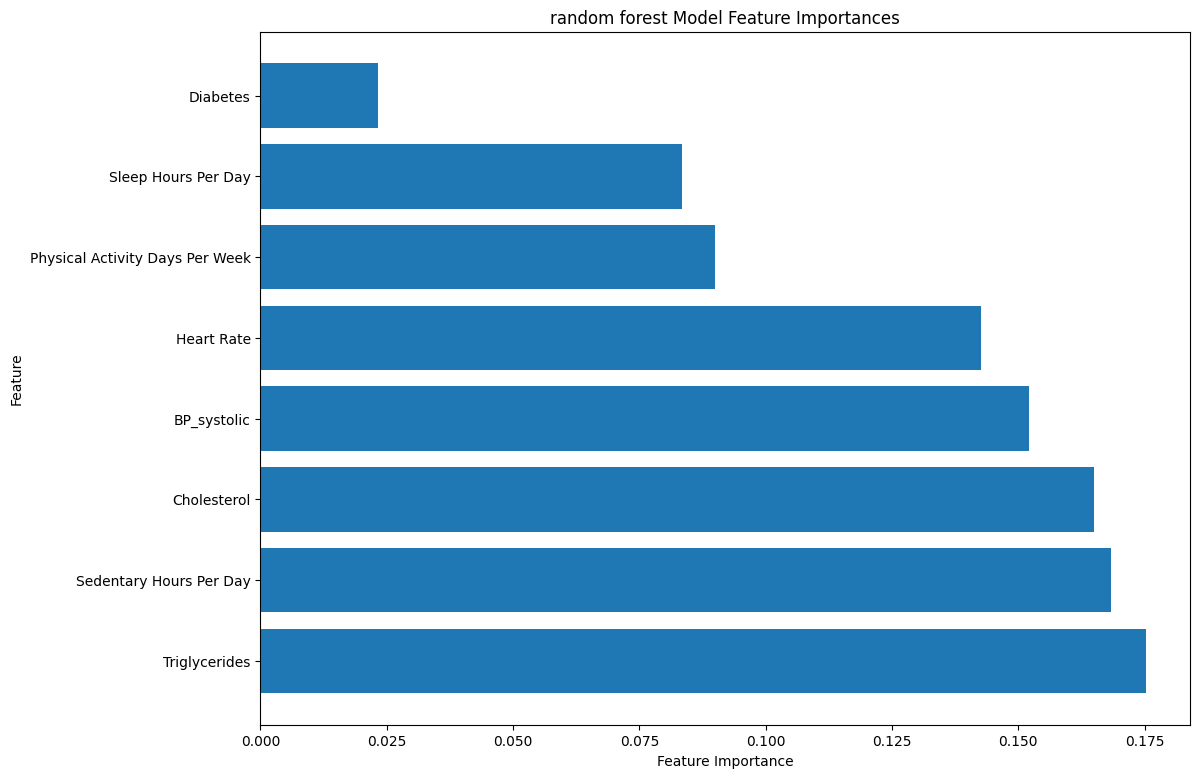

In [215]:
dt_feature_importances = rfc.feature_importances_
dt_features = pd.DataFrame({
    'Feature': x_resampled.columns,
    'Importance': dt_feature_importances
}).sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.barh(dt_features['Feature'], dt_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('random forest Model Feature Importances')
plt.show()

tuning


In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(x_resampled)

In [217]:
#logistic

lr_tune = LogisticRegression(max_iter=10000).fit(features, y_resampled)
y_train_pred_lr_tune = lr.predict(x_train)
y_test_pred_lr_tune = lr.predict(x_test)
cr_test_tune = classification_report(y_test, y_test_pred_lr_tune , target_names = ["class1" , "class2"])
print(cr_test_tune)


              precision    recall  f1-score   support

      class1       0.76      0.58      0.65      2250
      class2       0.25      0.43      0.31       736

    accuracy                           0.54      2986
   macro avg       0.50      0.50      0.48      2986
weighted avg       0.63      0.54      0.57      2986



In [218]:
#decision tree
dtc_tune = DecisionTreeClassifier()
dtc_tune.fit(features, y_resampled)
y_test_pred_dtc_tune = dtc.predict(x_test)
cr_test_dtc_tune = classification_report(y_test, y_test_pred_dtc_tune , target_names = ["class1" , "class2"])
print(cr_test_dtc_tune)

              precision    recall  f1-score   support

      class1       0.74      0.63      0.68      2250
      class2       0.23      0.34      0.27       736

    accuracy                           0.56      2986
   macro avg       0.49      0.48      0.48      2986
weighted avg       0.62      0.56      0.58      2986



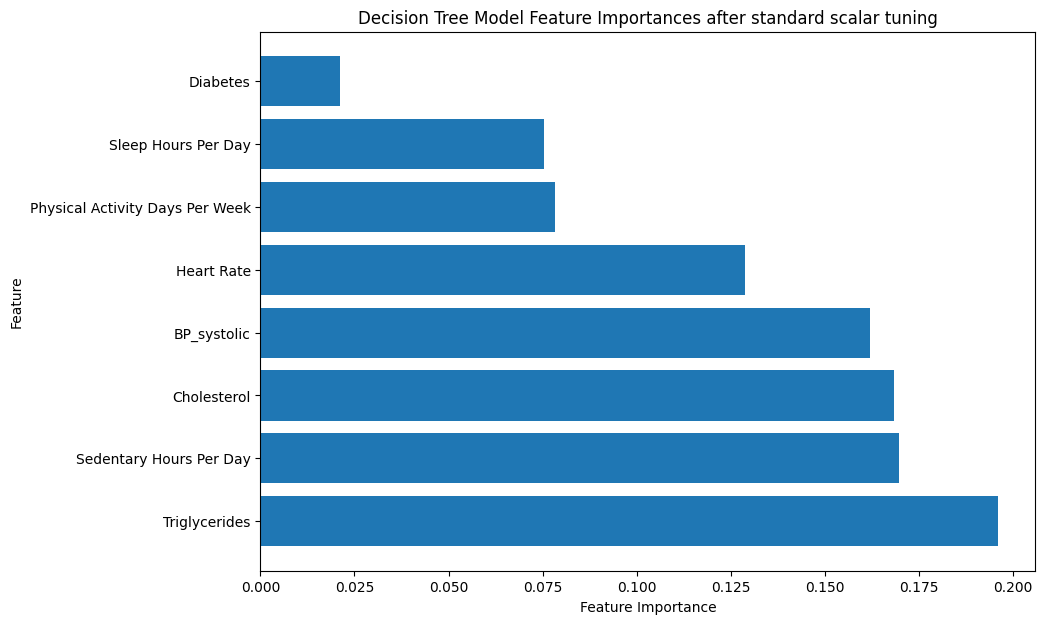

In [219]:
dt_feature_importances_tune = dtc_tune.feature_importances_
dt_features_balance_tune = pd.DataFrame({
    'Feature': x_resampled.columns,
    'Importance': dt_feature_importances_balance
}).sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.barh(dt_features_balance['Feature'], dt_features_balance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Model Feature Importances after standard scalar tuning')
plt.show()

In [220]:
#random forest
rfc_tune = RandomForestClassifier(random_state=42)
rfc_tune.fit(features, y_resampled)
y_test_pred_rfc_tune = rfc.predict(x_test)
cr_test_rfc_tune = classification_report(y_test, y_test_pred_rfc_tune , target_names = ["class1" , "class2"])
print(cr_test_rfc_tune)

              precision    recall  f1-score   support

      class1       0.76      0.73      0.74      2250
      class2       0.25      0.28      0.27       736

    accuracy                           0.62      2986
   macro avg       0.51      0.51      0.51      2986
weighted avg       0.63      0.62      0.63      2986



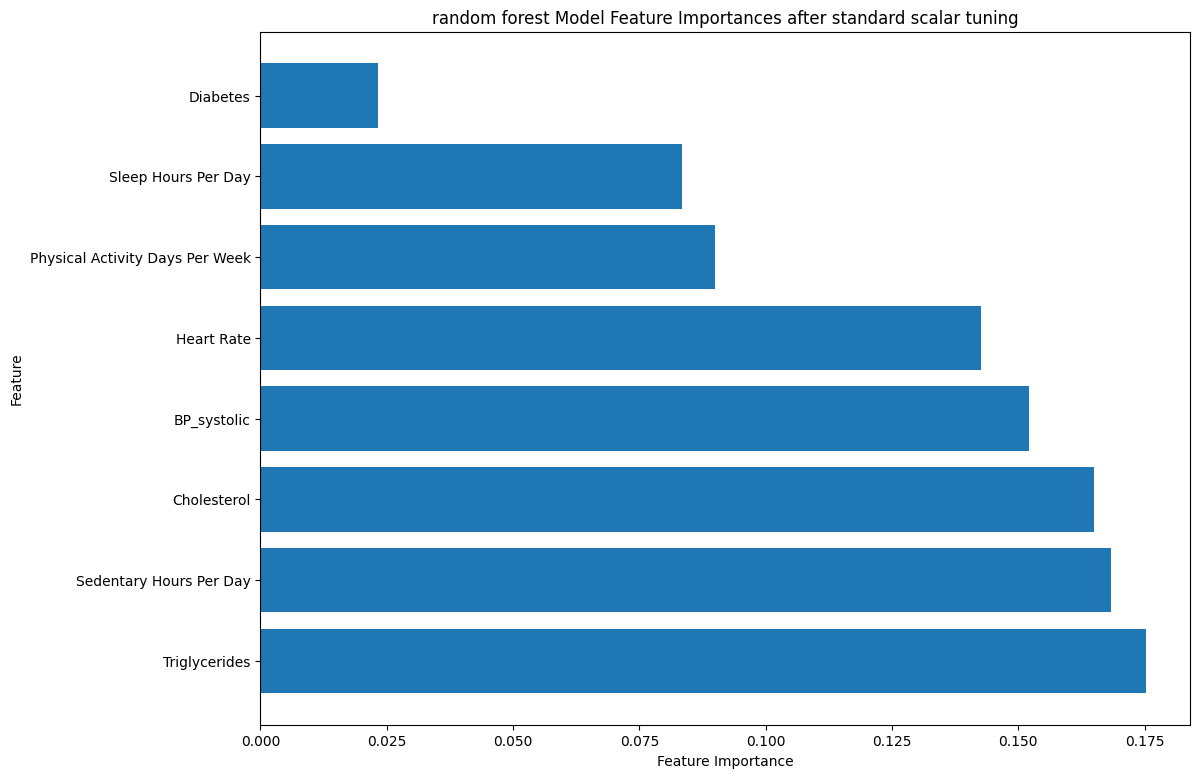

In [221]:
dt_feature_importances_tune = rfc_tune.feature_importances_
dt_features_tune = pd.DataFrame({
    'Feature': x_resampled.columns,
    'Importance': dt_feature_importances_tune
}).sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.barh(dt_features['Feature'], dt_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('random forest Model Feature Importances after standard scalar tuning')
plt.show()

hyperparameter tuning

In [222]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a Logistic Regression model
lr_hpt = LogisticRegression()

# Define the hyperparameter grid
param_distributions = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=lr_hpt, param_distributions=param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(x_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_logreg_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_lr_hpt = best_logreg_model.predict(x_test)


Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 400, 'C': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [223]:
print("confusion matrix: \n")
print( confusion_matrix(y_test, y_pred_lr_hpt))
print("classification report for test data by linear regression after hyperparameter tuning: \n")
lr_test_hpt = classification_report(y_test, y_pred_lr_hpt , target_names = ["class1" , "class2"])
print(lr_test_hpt)

confusion matrix: 

[[1300  950]
 [ 421  315]]
classification report for test data by linear regression after hyperparameter tuning: 

              precision    recall  f1-score   support

      class1       0.76      0.58      0.65      2250
      class2       0.25      0.43      0.31       736

    accuracy                           0.54      2986
   macro avg       0.50      0.50      0.48      2986
weighted avg       0.63      0.54      0.57      2986



In [224]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_hpt = DecisionTreeClassifier()
param_distributions_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_dt = RandomizedSearchCV(estimator=dt_hpt, param_distributions=param_distributions_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_dt.fit(x_resampled, y_resampled)

print("Best Hyperparameters:", random_search_dt.best_params_)

best_model_dt = random_search_dt.best_estimator_

y_pred_dt_hpt = best_model_dt.predict(x_test)



Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


In [225]:
print("confusion matrix: \n")
print( confusion_matrix(y_test, y_pred_dt_hpt))
print("classification report for test data by decision tree classifier after hyperparameter tuning: \n")
dt_test_hpt = classification_report(y_test, y_pred_dt_hpt , target_names = ["class1" , "class2"])
print(dt_test_hpt)

confusion matrix: 

[[1436  814]
 [ 484  252]]
classification report for test data by decision tree classifier after hyperparameter tuning: 

              precision    recall  f1-score   support

      class1       0.75      0.64      0.69      2250
      class2       0.24      0.34      0.28       736

    accuracy                           0.57      2986
   macro avg       0.49      0.49      0.48      2986
weighted avg       0.62      0.57      0.59      2986



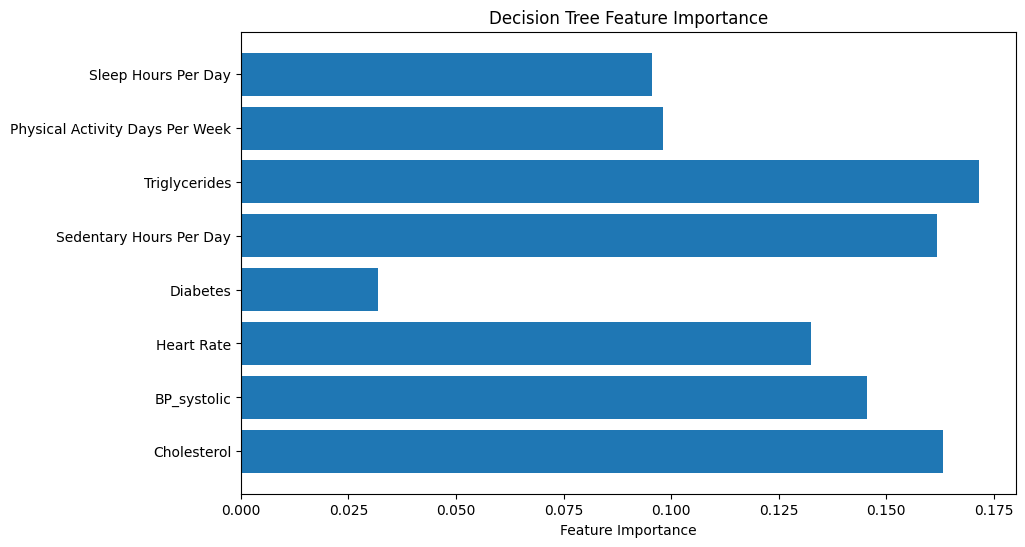

In [226]:
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code for training the model)

# Get feature importances from the best DecisionTreeClassifier model
feature_importances = best_model_dt.feature_importances_

# Get the names of the features (assuming you have feature names available)
feature_names = x_resampled.columns # Replace with your actual feature names

# Create a bar graph to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align="center")
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()


In [227]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_hpt = RandomForestClassifier()
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_hpt, param_distributions=param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(x_resampled, y_resampled)

print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_

y_pred_rfc_hpt = best_model.predict(x_test)



Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


In [228]:
print("confusion matrix: \n")
print( confusion_matrix(y_test, y_pred_rfc_hpt))
print("classification report for test data by decision tree classifier after hyperparameter tuning: \n")
rfc_test_hpt = classification_report(y_test, y_pred_rfc_hpt , target_names = ["class1" , "class2"])
print(rfc_test_hpt)

confusion matrix: 

[[1559  691]
 [ 505  231]]
classification report for test data by decision tree classifier after hyperparameter tuning: 

              precision    recall  f1-score   support

      class1       0.76      0.69      0.72      2250
      class2       0.25      0.31      0.28       736

    accuracy                           0.60      2986
   macro avg       0.50      0.50      0.50      2986
weighted avg       0.63      0.60      0.61      2986



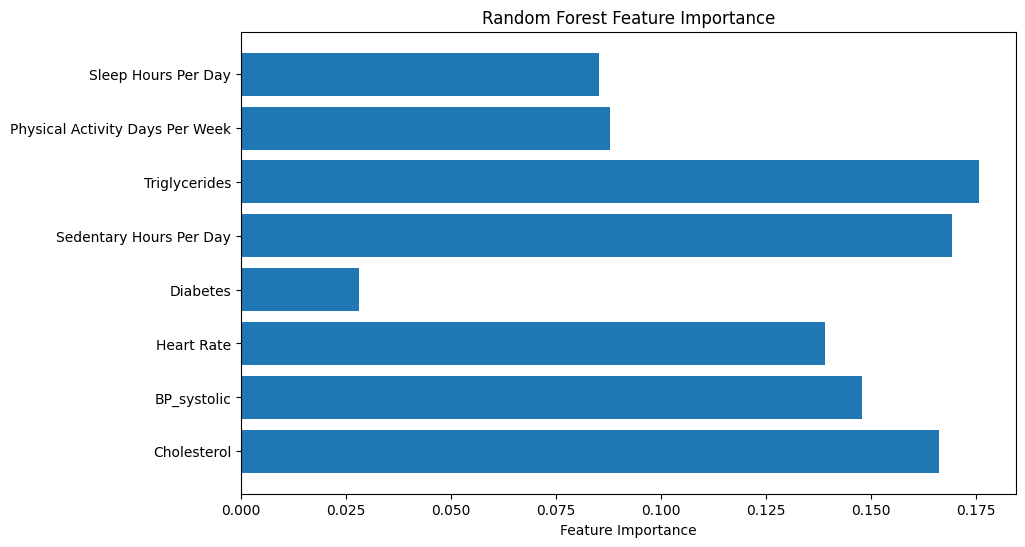

In [229]:
import matplotlib.pyplot as plt

# Assuming x_resampled and y_resampled are your training data and labels
# Assuming your_feature_names is a list of feature names
# Assuming best_model is the trained Random Forest model from your hyperparameter tuning

# ... (your existing code for training the model)

# Get feature importances from the best RandomForestClassifier model
feature_importances = best_model.feature_importances_

# Create a bar graph to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align="center")
plt.yticks(range(len(feature_importances)), x_resampled.columns)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()
